In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

In [3]:
transform = transforms.ToTensor()

In [4]:
train_data = datasets.MNIST(root = '/home/maxime3343/Documents/Jupyter NoteBook/Image Datasets', train = True, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /home/maxime3343/Documents/Jupyter NoteBook/Image Datasets
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data = datasets.MNIST(root='/home/maxime3343/Documents/Jupyter NoteBook/Image Datasets',train = False, download = True, transform=transform)

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /home/maxime3343/Documents/Jupyter NoteBook/Image Datasets
    Split: Test
    StandardTransform
Transform: ToTensor()

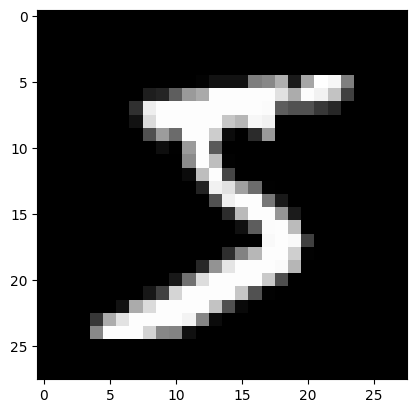

In [8]:
image, label = train_data[0]
plt.imshow(image.reshape(28,28), cmap='gray')

In [9]:
train_loader = DataLoader(train_data, batch_size = 100, shuffle = True)
test_loader = DataLoader(test_data, batch_size=500, shuffle = True)
# Create batches out of our training and test datasets

In [11]:
for images, labels in train_loader:
    break
images.shape

torch.Size([100, 1, 28, 28])

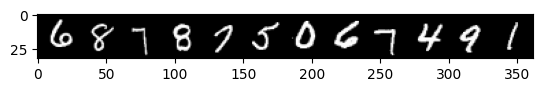

In [14]:
im = make_grid(images[:12], nrow=12)
plt.imshow(np.transpose(im.numpy(), (1,2,0)))

In [22]:
# ANN for MNSIT Dataset.

# Model Flattens out the image automatically, which is an improvement.
# Use of nn.Sequential to create our Neural Network.

class Model(nn.Sequential):
    def __init__(self, in_features = 784, out_features=10, layers=[120,84]):
        super().__init__(
            nn.Flatten(),
            nn.ReLU(),
            nn.Linear(in_features, layers[0]),
            nn.ReLU(),
            nn.Linear(layers[0], layers[1]),
            nn.ReLU(),
            nn.Linear(layers[1], out_features),
            nn.LogSoftmax(dim=1)
        )

In [25]:
model = Model()

In [26]:
model

Model(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): ReLU()
  (2): Linear(in_features=784, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=84, bias=True)
  (5): ReLU()
  (6): Linear(in_features=84, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

In [27]:
learning_rate = 0.001

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [29]:
epochs = 10

In [30]:
# Training with Training Dataset.

import time
start_time = time.time()

#Trackers.
train_losses = []
test_losses = []
correct_number = 0

losses = []

for i in range(epochs):
    
    # b is the count since we are using Python Enumerate, batch count to be more specific.
    # (X_train, y_train) is a tuple we are getting back from the train_loader.
    # Image and its label returned as a tuple.
    for b, (X_train, y_train) in enumerate(train_loader):
        b += 1 #Start the count at 1, and not 0
        
        # Returns 10 unnormalized logits for every image.
        y_pred = model(X_train) 
        
        # Requires unnormalized logits, with a label encoding.
        trn_loss = criterion(y_pred, y_train)

        # Performing Backpropagation
        optimizer.zero_grad()
        trn_loss.backward()
        optimizer.step()
        
        # Print out the results.
        if b%200 == 0:
            print(f'Epoch {i} batch:{b} loss:{trn_loss.item()}')
            
    # Test Dataset as we training the data.
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            tst_loss = criterion(y_val, y_test)
        
    # We append to both Losses Lists, so they have same number to be plotted out.
    train_losses.append(trn_loss)
    test_losses.append(tst_loss)
        
# Prints out total duration of training.    
print(f'Total time taken by training: {time.time()-start_time} seconds.')

Epoch 0 batch:200 loss:0.3242891728878021
Epoch 0 batch:400 loss:0.20964981615543365
Epoch 0 batch:600 loss:0.2338968813419342
Epoch 1 batch:200 loss:0.16981637477874756
Epoch 1 batch:400 loss:0.1351710557937622
Epoch 1 batch:600 loss:0.20448553562164307
Epoch 2 batch:200 loss:0.09353902190923691
Epoch 2 batch:400 loss:0.05747871473431587
Epoch 2 batch:600 loss:0.17822867631912231
Epoch 3 batch:200 loss:0.09654907137155533
Epoch 3 batch:400 loss:0.1364956498146057
Epoch 3 batch:600 loss:0.08403120189905167
Epoch 4 batch:200 loss:0.07128051668405533
Epoch 4 batch:400 loss:0.029411492869257927
Epoch 4 batch:600 loss:0.035262662917375565
Epoch 5 batch:200 loss:0.09632422775030136
Epoch 5 batch:400 loss:0.06829632818698883
Epoch 5 batch:600 loss:0.02404000796377659
Epoch 6 batch:200 loss:0.04987999051809311
Epoch 6 batch:400 loss:0.025402918457984924
Epoch 6 batch:600 loss:0.009366842918097973
Epoch 7 batch:200 loss:0.06897380948066711
Epoch 7 batch:400 loss:0.04244985431432724
Epoch 7 bat

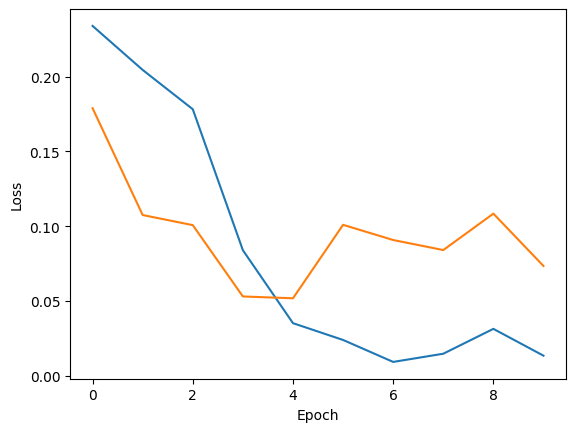

In [31]:
# Plots out the Loss Function.

# Epochs = 10.
with torch.no_grad():
    plt.plot(range(epochs), train_losses)
    plt.plot(range(epochs), test_losses)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

In [33]:
# Evaluation of the model.

# Tracker.
correct_number = 0

with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):
        y_val = model(X_test)
        loss = criterion(y_val, y_test)
    
        prediction = torch.argmax(y_val, dim=1)
        correct_number += (prediction==y_test).sum()
        
print(f'{correct_number} numbers out of 10000 were guessed right by the Model. Gives out an accuracy of {(correct_number/10000) * 100}%')

9755 numbers out of 10000 were guessed right by the Model. Gives out an accuracy of 97.54999542236328%
